<a href="https://colab.research.google.com/github/chillMLguy/ML24-25L/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praca domowa nr 5**

### 0. Kod z zajęć + funkcja generująca filmik

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from IPython.display import display
import time


torch.manual_seed(42)
np.random.seed(42)

focus1 = torch.tensor([-2.0, 0.0])
focus2 = torch.tensor([2.0, 0.0])
constant_sum = 6.0


def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])

    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')


    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()

    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()


def make_animation(trajectories):
    trajectories_np = np.array(trajectories)
    num_points, num_frames, _ = trajectories_np.shape
    frame_indices = list(range(0, num_frames, 10))

    fig, ax = plt.subplots(figsize=(6, 6))
    sc = ax.scatter([], [], s=30)
    ax.plot(-2, 0, 'rx', markersize=10)
    ax.plot(2, 0, 'rx', markersize=10)
    title = ax.set_title("")

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)


    def init():
        sc.set_offsets(np.empty((0, 2)))
        title.set_text("")
        return sc, title

    def animate(frame_idx):
        positions = trajectories_np[:, frame_idx, :]
        sc.set_offsets(positions)
        title.set_text(f"Epoch {frame_idx}")
        return sc, title

    anim = FuncAnimation(fig, animate, frames=frame_indices,
                     init_func=init, blit=True, interval=100)

    return HTML(anim.to_html5_video())


### 1. Norma  $\ell_0$

In [15]:
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # [-5, 5]
points.requires_grad = True


trajectories = [[] for _ in range(num_points)]
loss_history = []


start_time = time.time()
optimizer = torch.optim.Adam([points], lr=0.1)

num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    loss = torch.mean((dist1 + dist2 - constant_sum != 0).float())

    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    if epoch % 10 == 0:
        plot_results(epoch, trajectories, loss_history)
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

end_time = time.time()

display(make_animation(trajectories))

print(f"Elapsed time: {end_time - start_time:.2f} seconds")


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Wniosek:

Podczas trenowania z tą funkcją straty pojawia się błąd, ponieważ PyTorch nie potrafi wyznaczyć gradientu. Funkcja ta bazuje na liczeniu punktów, które nie spełniają warunku elipsy, co jest funkcją skokową, a więc nie da się jej zróżniczkować. Nie da się więc wyznaczyć kierunku, w którym punkty powinny się przesuwać, więc trening w ogóle nie rusza z miejsca. Nawet jeśli nie pojawiłby się błąd, optymalizacja i tak byłaby nieskuteczna.

### 2. Norma  $\ell_1$

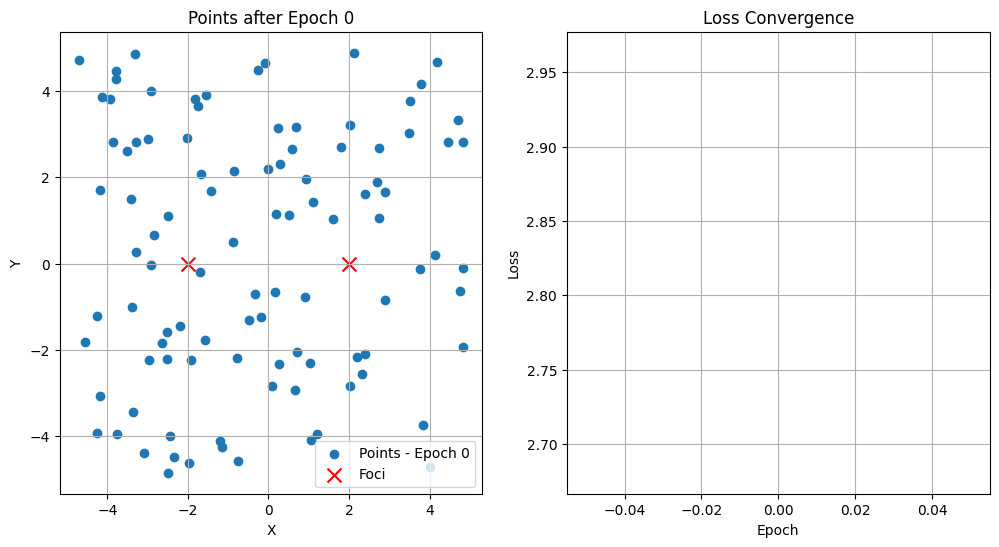

Epoch 0: Loss = 2.821944


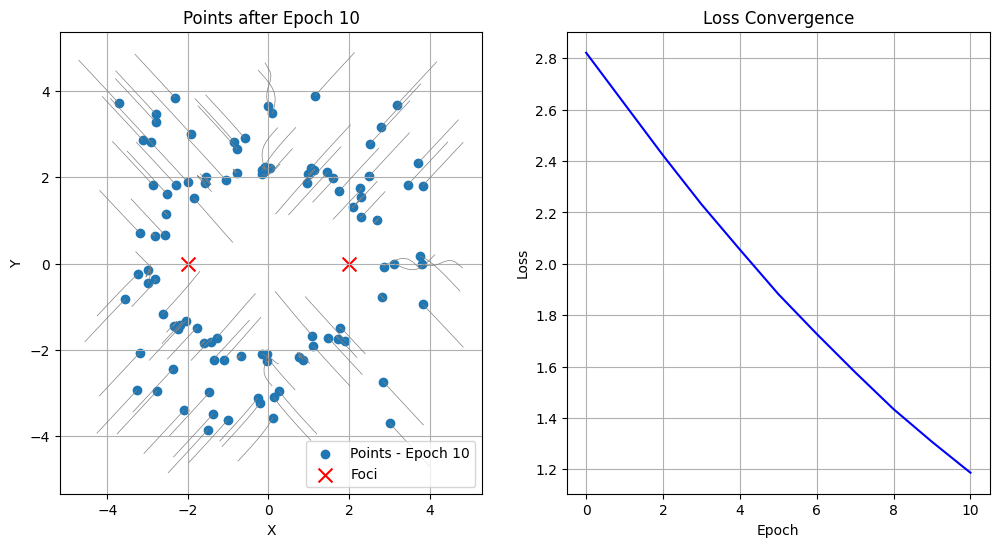

Epoch 10: Loss = 1.186345


Epoch 20: Loss = 0.340901


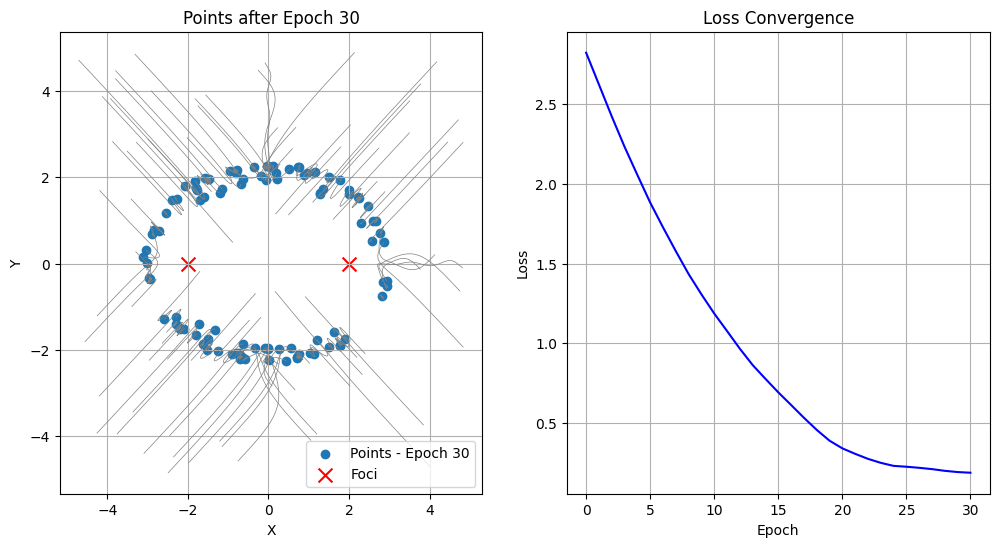

Epoch 30: Loss = 0.188022


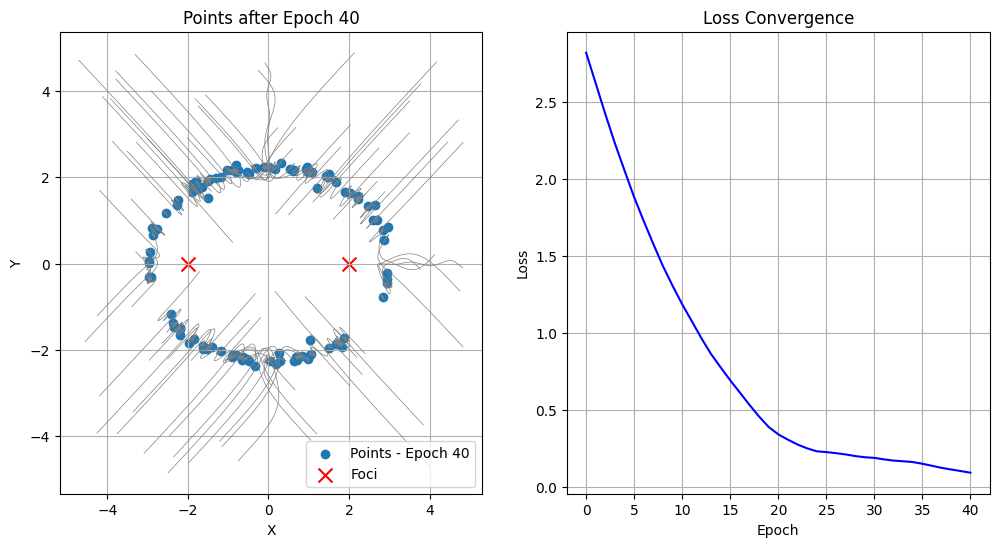

Epoch 40: Loss = 0.091581


Epoch 50: Loss = 0.054240


Epoch 60: Loss = 0.041125


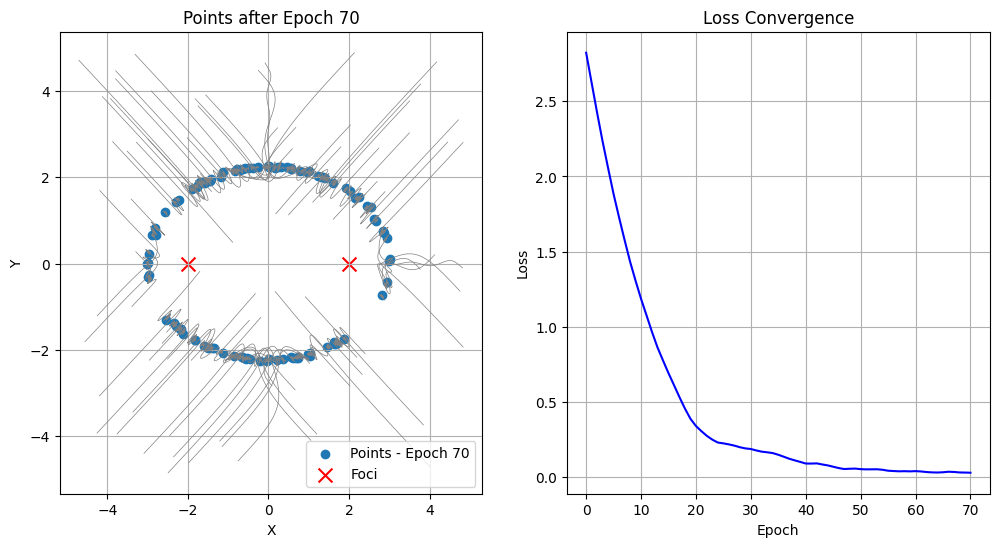

Epoch 70: Loss = 0.030457


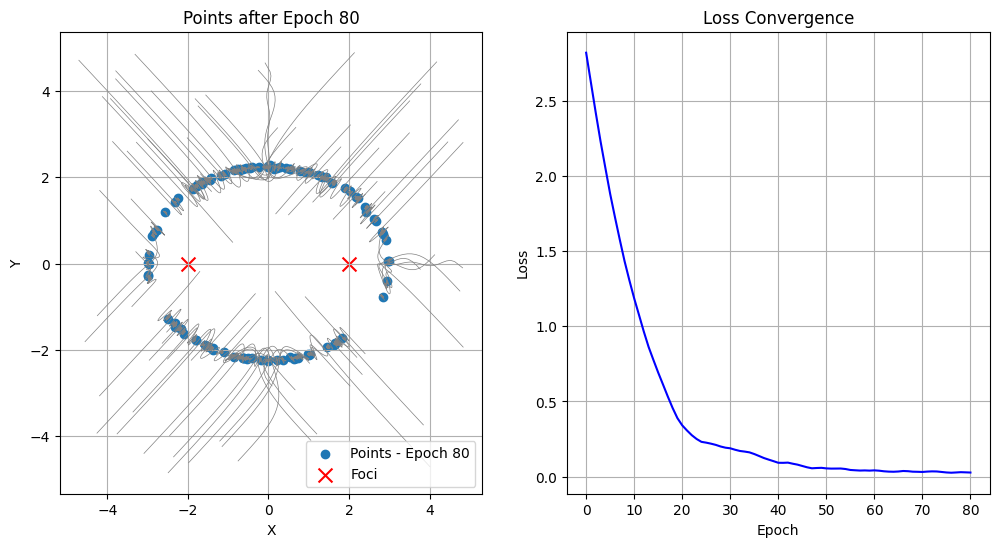

Epoch 80: Loss = 0.026596


Epoch 90: Loss = 0.025153


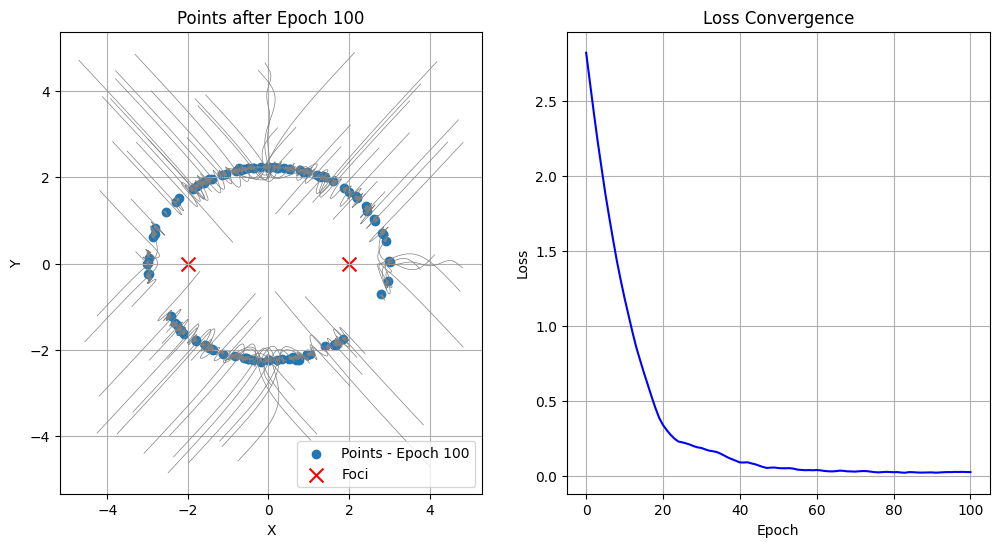

Epoch 100: Loss = 0.027250


Epoch 110: Loss = 0.025810


Epoch 120: Loss = 0.025747


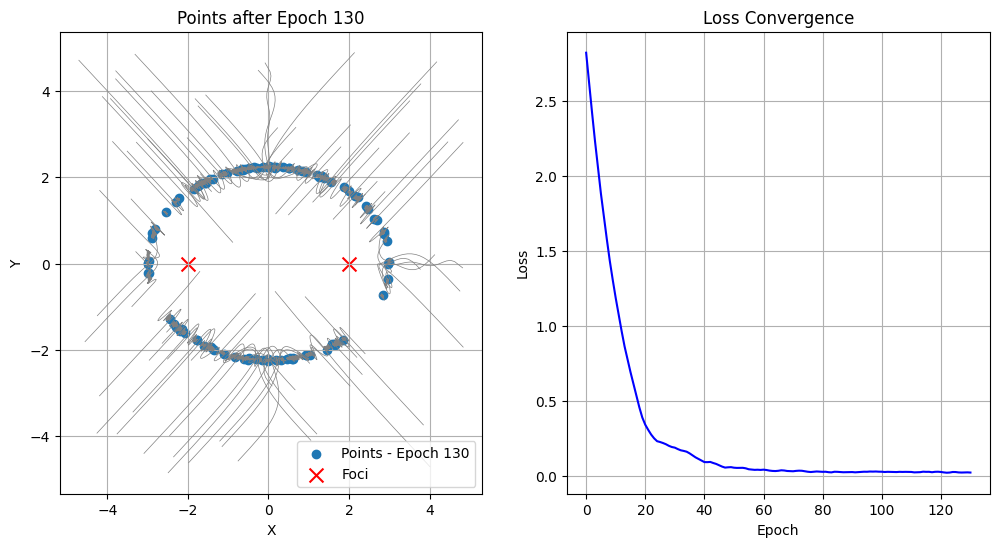

Epoch 130: Loss = 0.021904


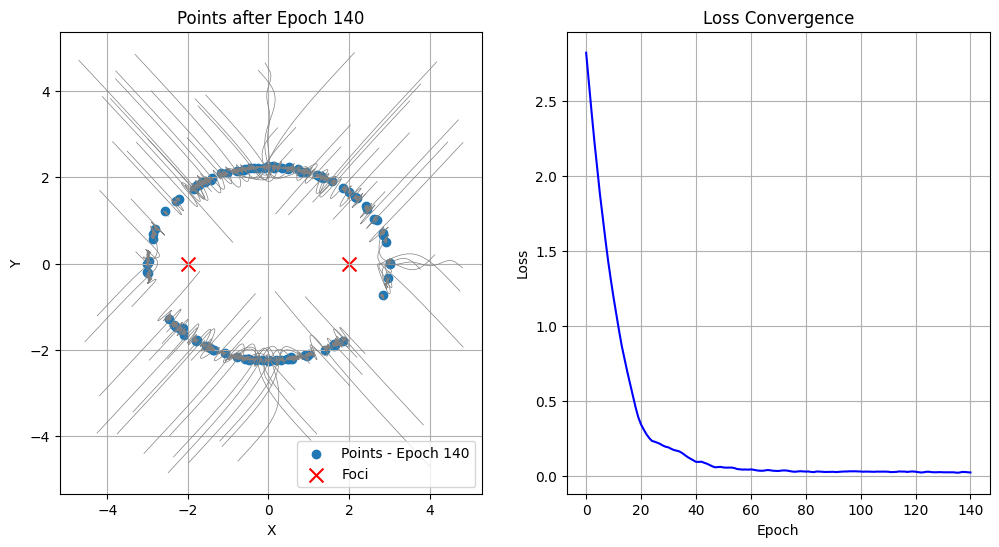

Epoch 140: Loss = 0.020619


Epoch 150: Loss = 0.023130


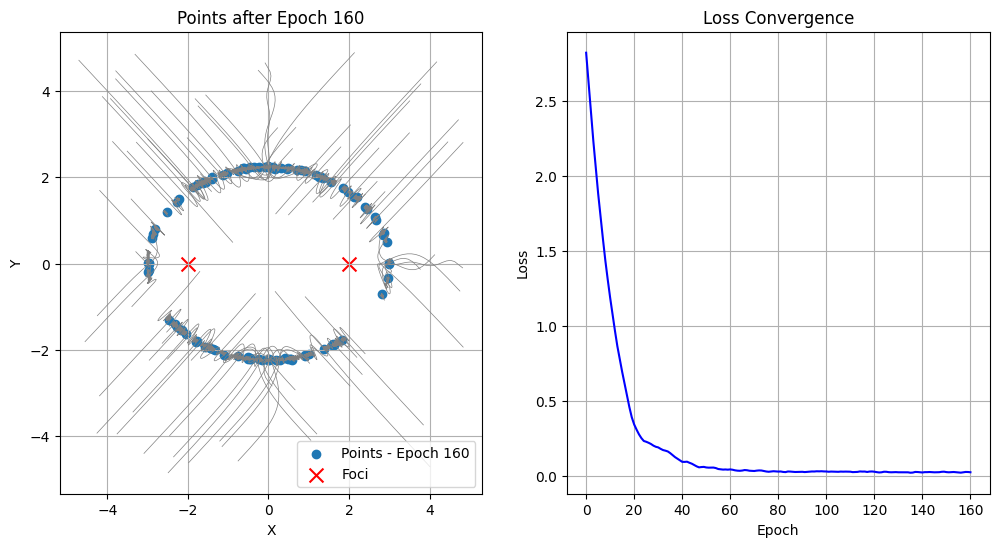

Epoch 160: Loss = 0.022084


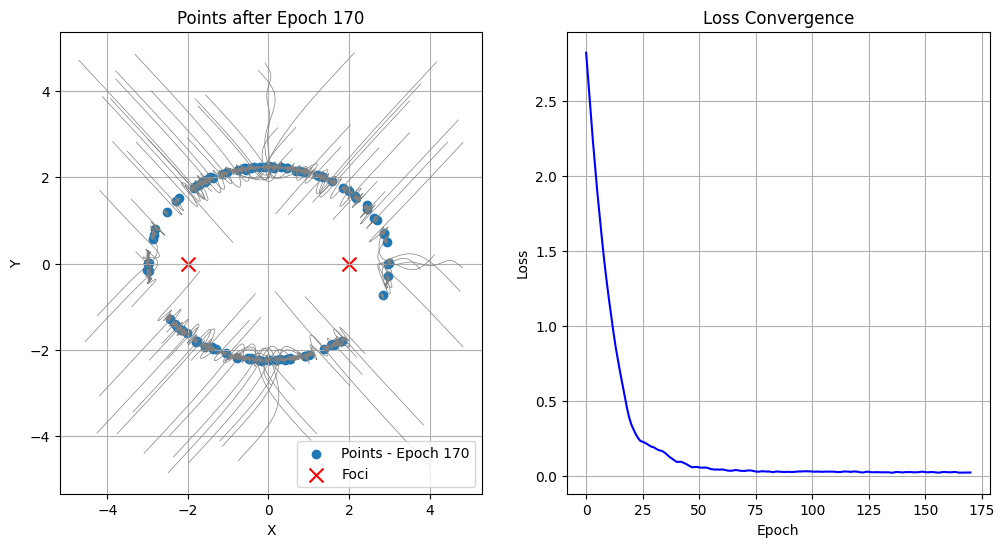

Epoch 170: Loss = 0.020406


Epoch 180: Loss = 0.021806


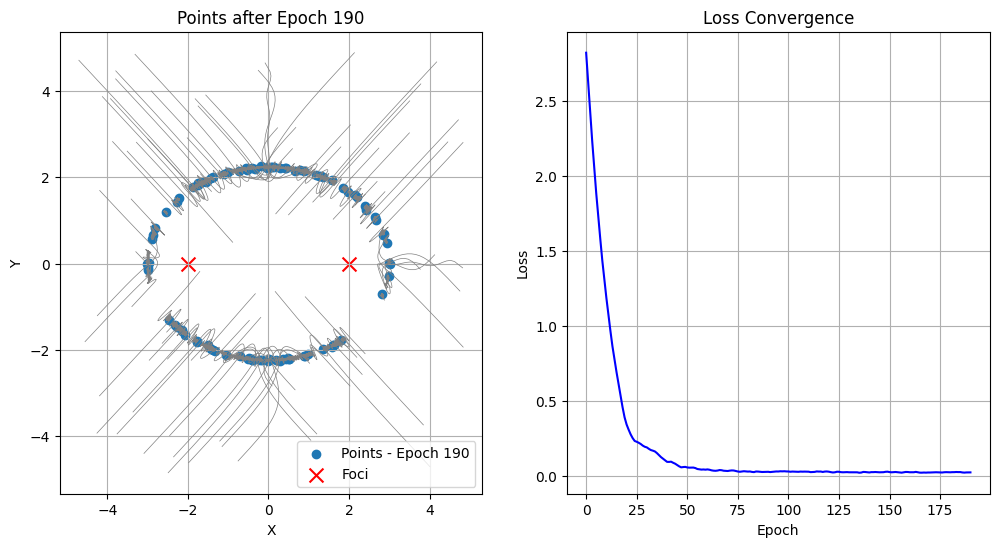

Epoch 190: Loss = 0.021246


Elapsed time: 14.57 seconds


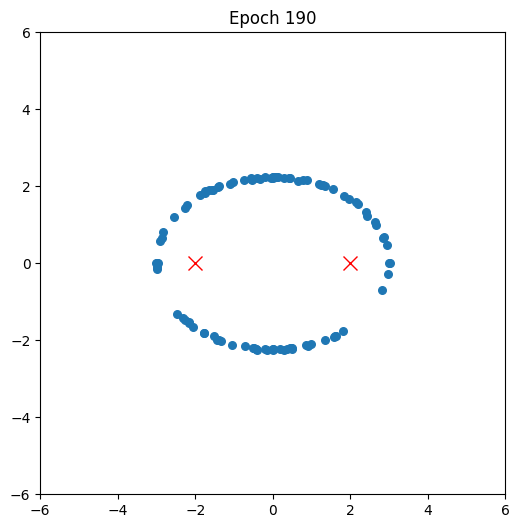

In [17]:
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # [-5, 5]
points.requires_grad = True


trajectories = [[] for _ in range(num_points)]
loss_history = []


start_time = time.time()
optimizer = torch.optim.Adam([points], lr=0.1)

num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    loss = torch.mean(torch.abs(dist1 + dist2 - constant_sum))

    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    if epoch % 10 == 0:
        plot_results(epoch, trajectories, loss_history)
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

end_time = time.time()

display(make_animation(trajectories))

print(f"Elapsed time: {end_time - start_time:.2f} seconds")

Wniosek:

Trenowanie z tą funkcją działa, a punkty dość szybko zaczynają przypominać elipsę. Problem polega jednak na tym, że mimo osiągnięcia kształtu, funkcja straty cały czas lekko oscylują i wynosi około 0.021. Dzieje się tak, ponieważ ta funkcja traktuje błąd każdego punktu jednakowo, bez względu na to, jak blisko ideału już się znajduje, ponieważ pochodna jest stała. To sprawia, że nawet dobrze dopasowane punkty są nadal przesuwane, w taki sam sposób co punkty leżące dalej przez co trudno osiągnąć pełną stabilizację.

### 3. Norma  $\ell_{\infty}$

Epoch 0: Loss = 5.959137


Epoch 10: Loss = 5.095608


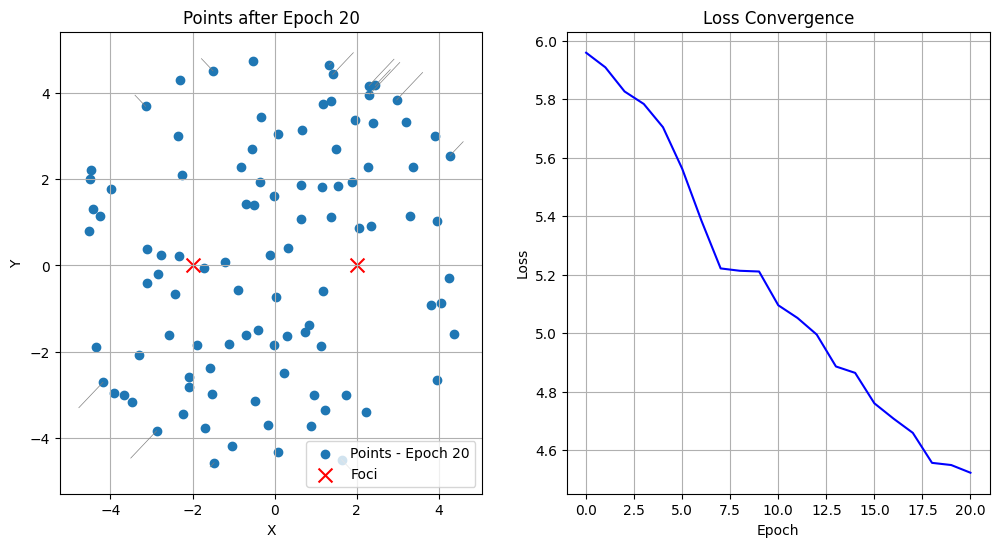

Epoch 20: Loss = 4.523056


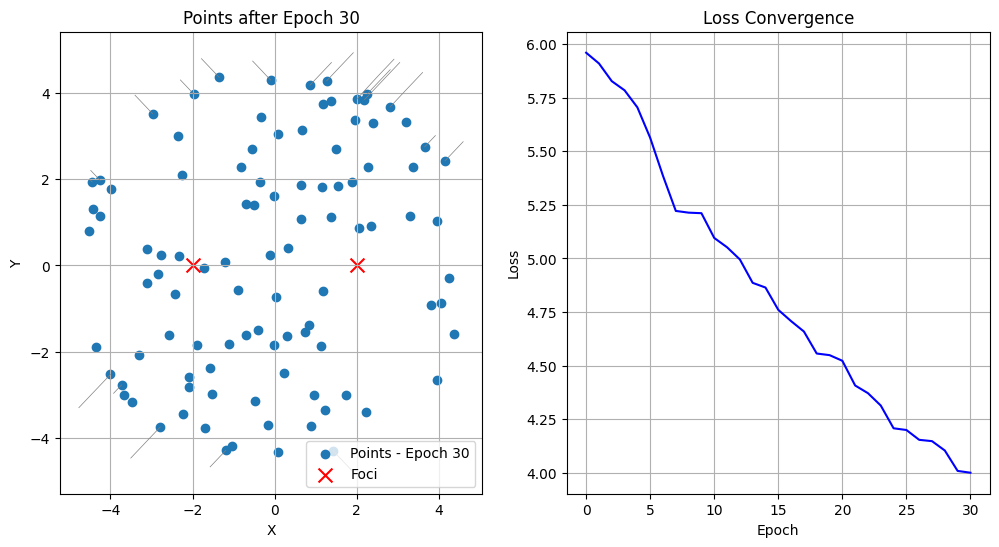

Epoch 30: Loss = 4.001136


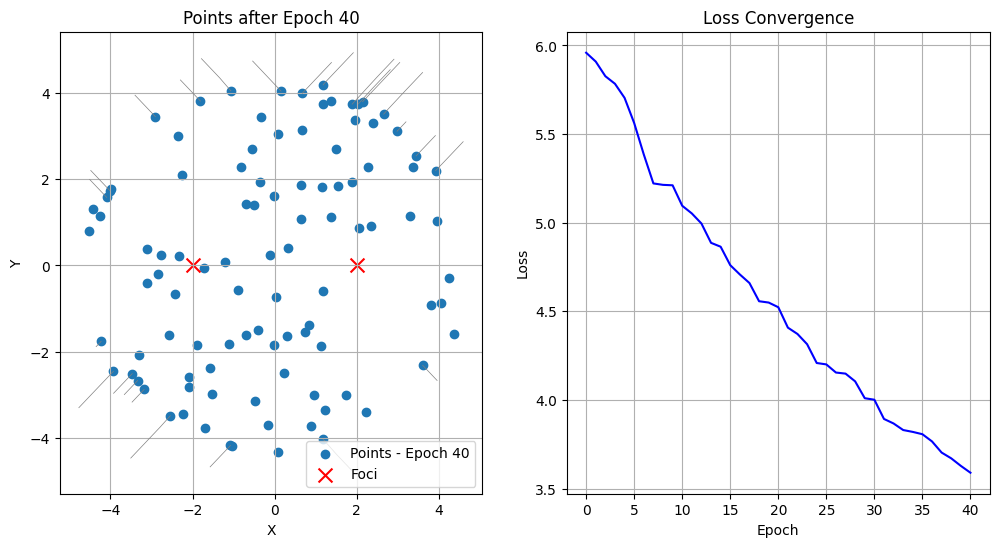

Epoch 40: Loss = 3.589146


Epoch 50: Loss = 3.138609


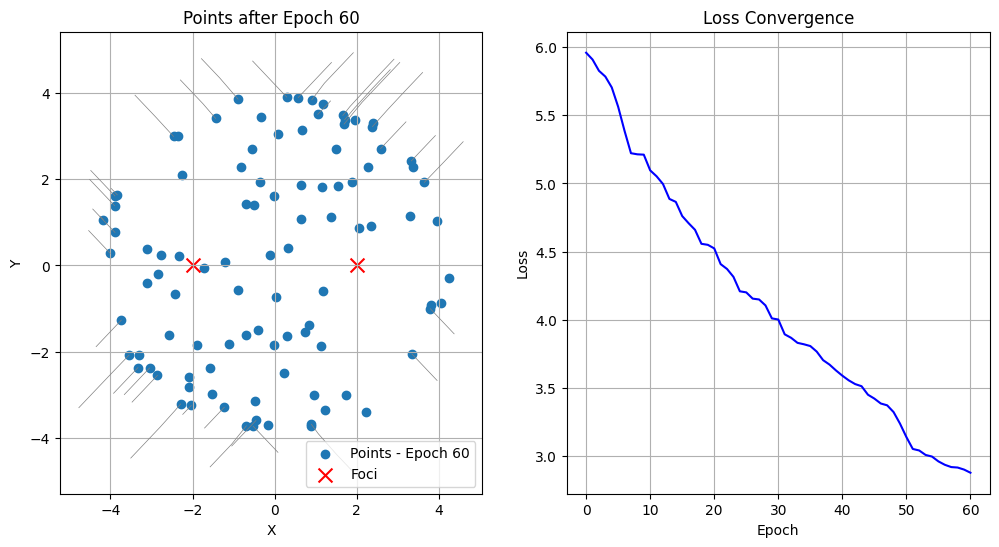

Epoch 60: Loss = 2.876881


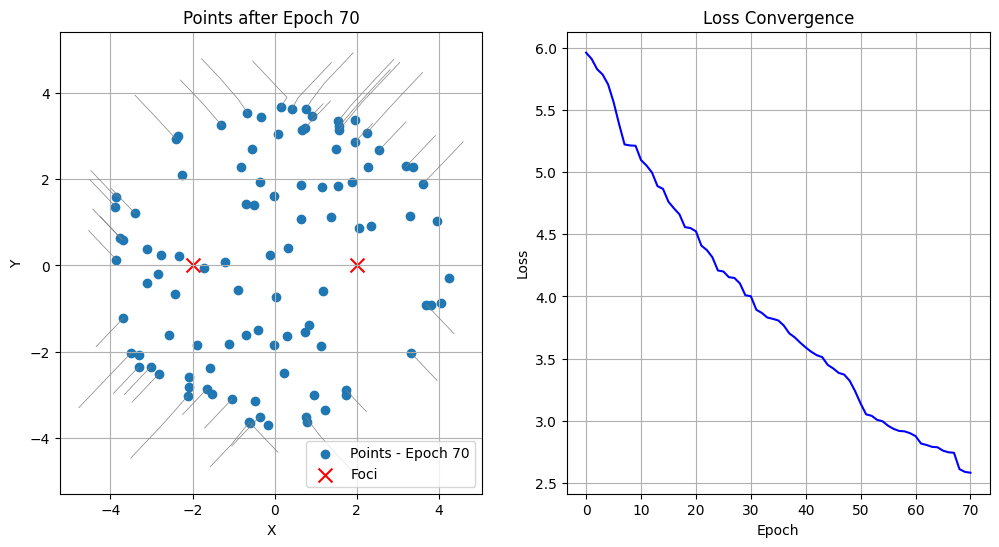

Epoch 70: Loss = 2.582285


Epoch 80: Loss = 2.331803


Epoch 90: Loss = 2.045676


Epoch 100: Loss = 1.902664


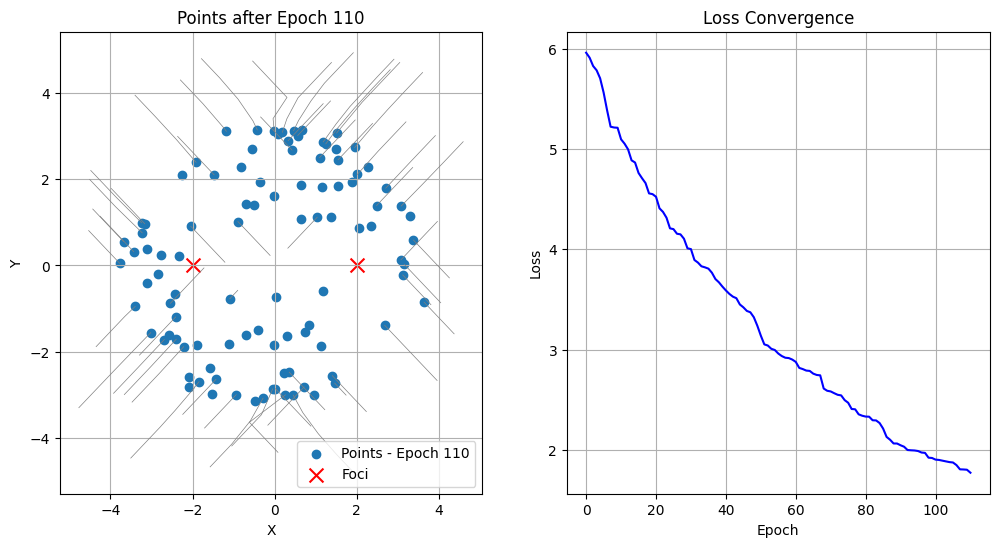

Epoch 110: Loss = 1.771902


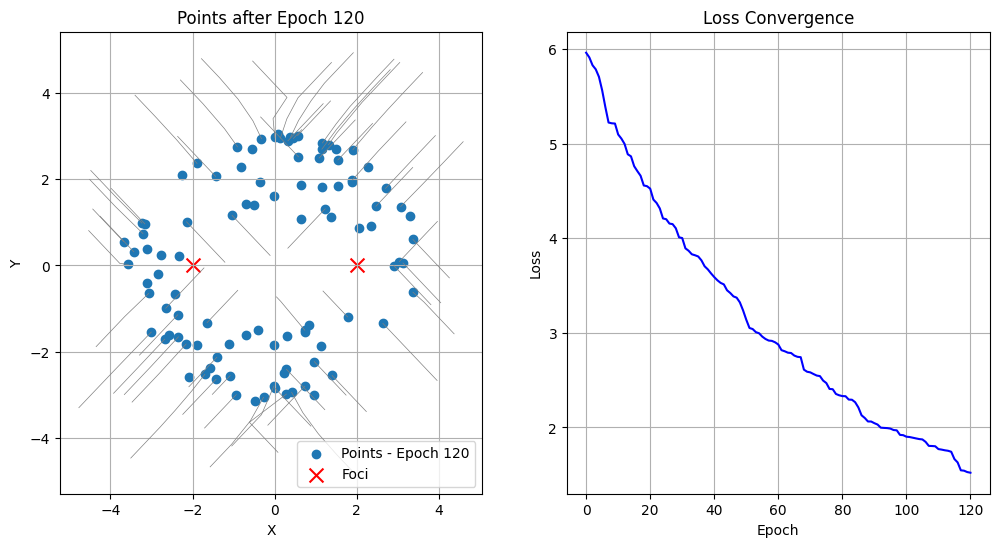

Epoch 120: Loss = 1.522167


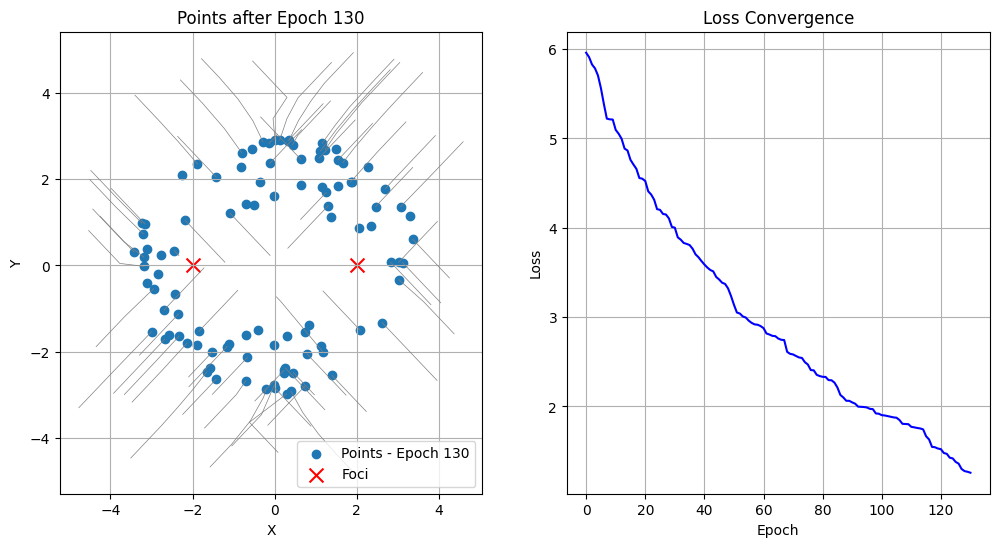

Epoch 130: Loss = 1.258444


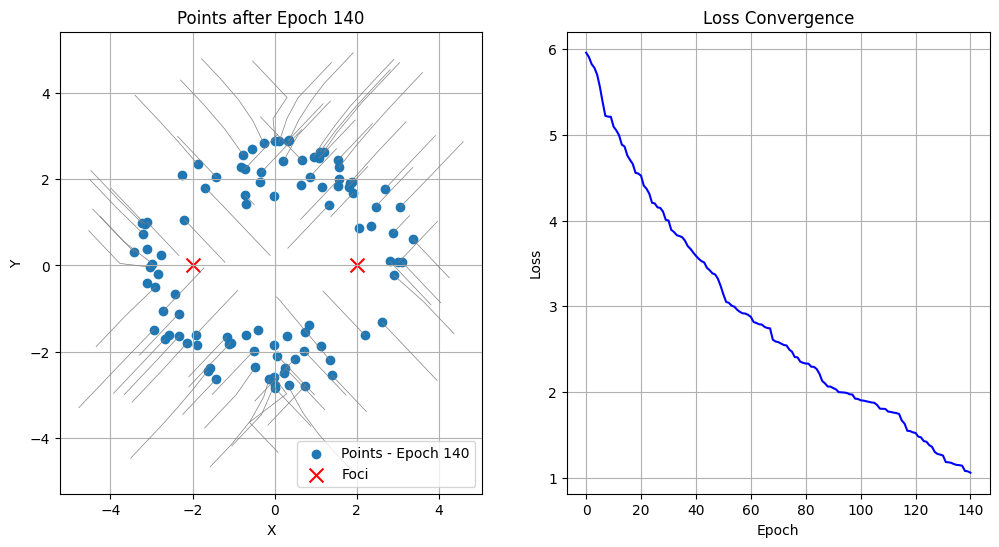

Epoch 140: Loss = 1.057785


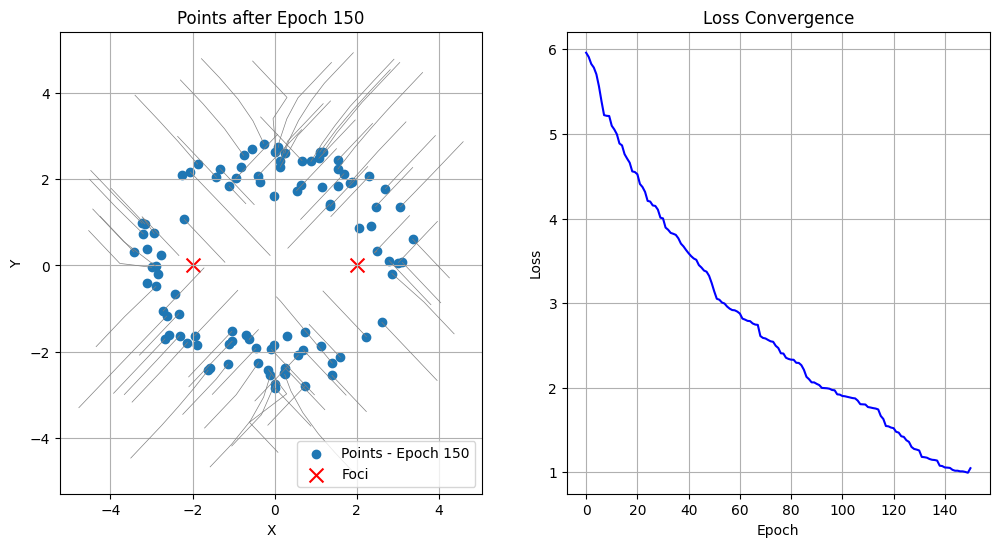

Epoch 150: Loss = 1.049297


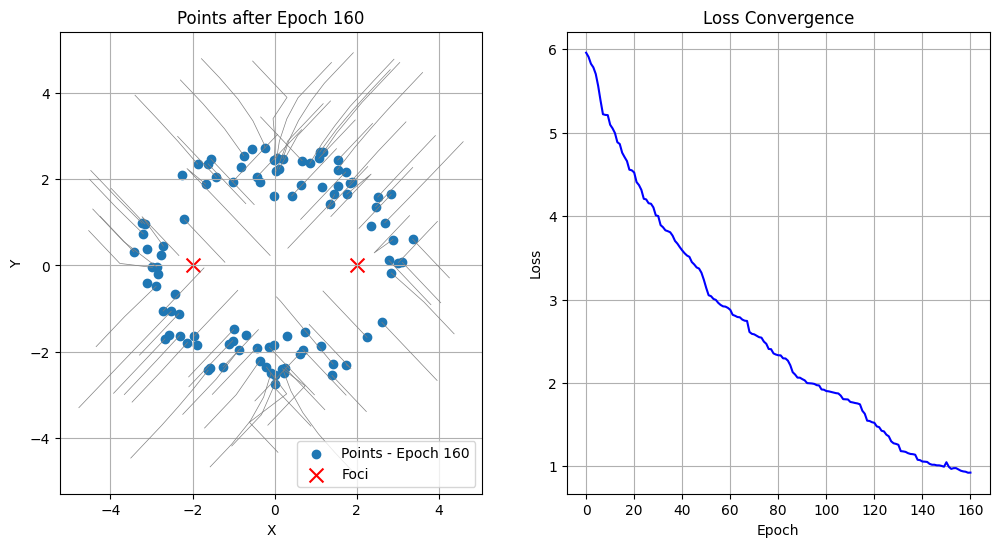

Epoch 160: Loss = 0.924967


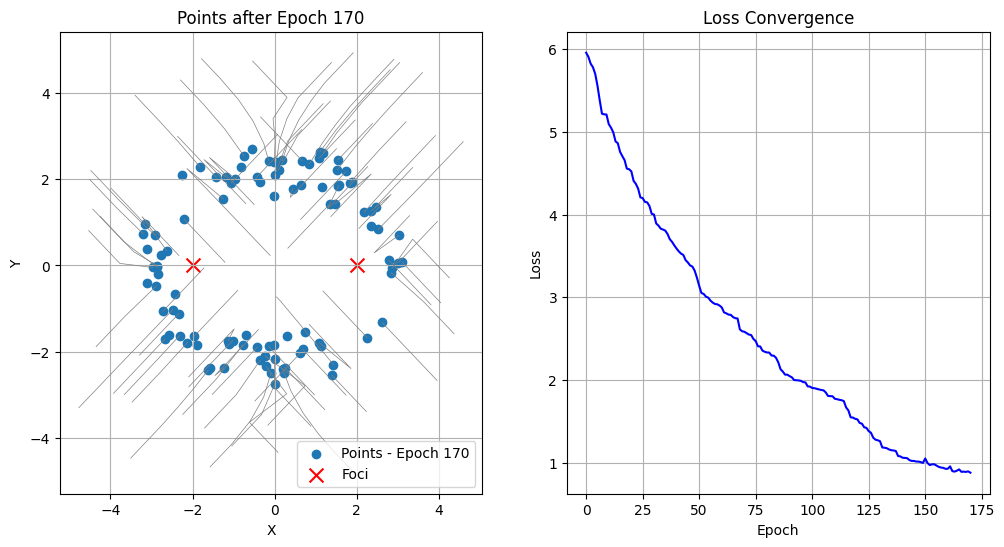

Epoch 170: Loss = 0.876698


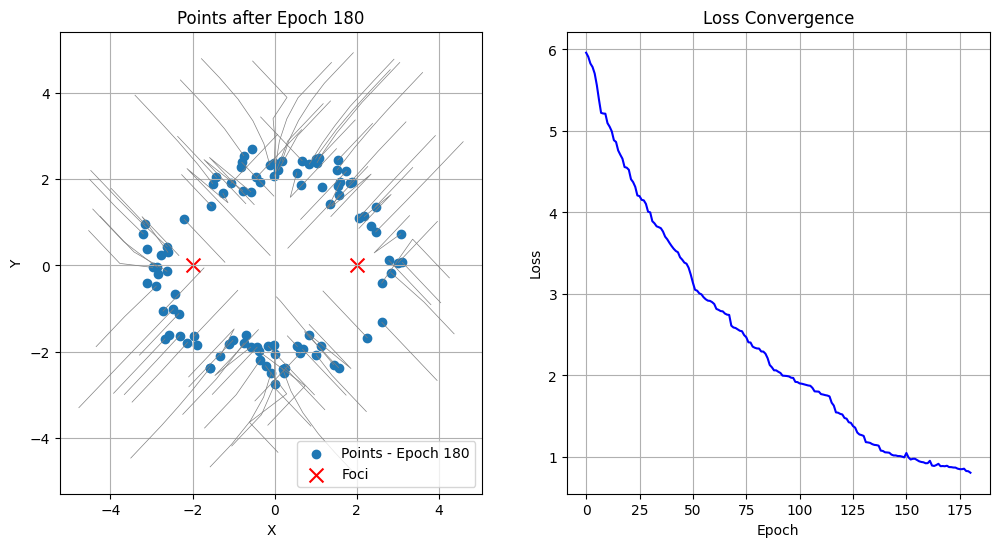

Epoch 180: Loss = 0.807442


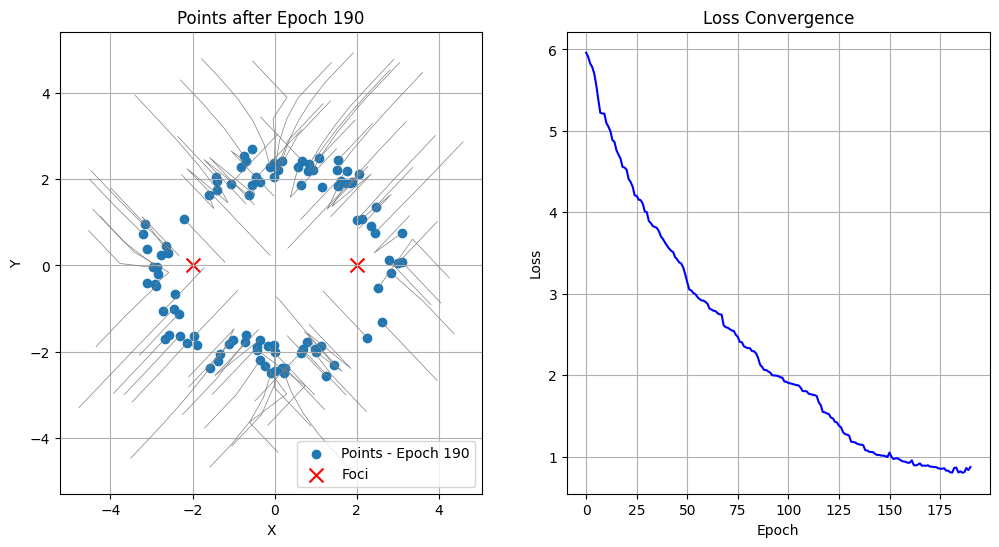

Epoch 190: Loss = 0.871542


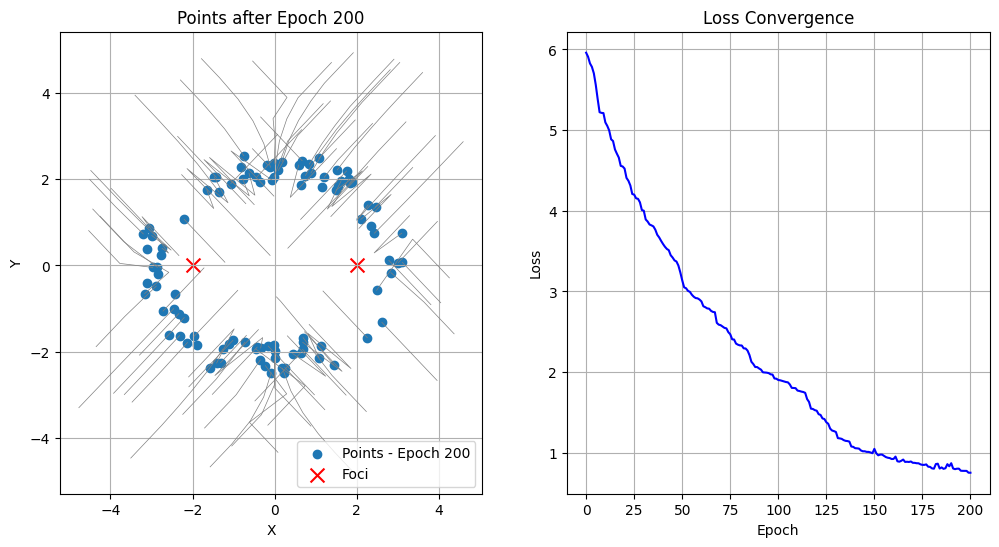

Epoch 200: Loss = 0.753671


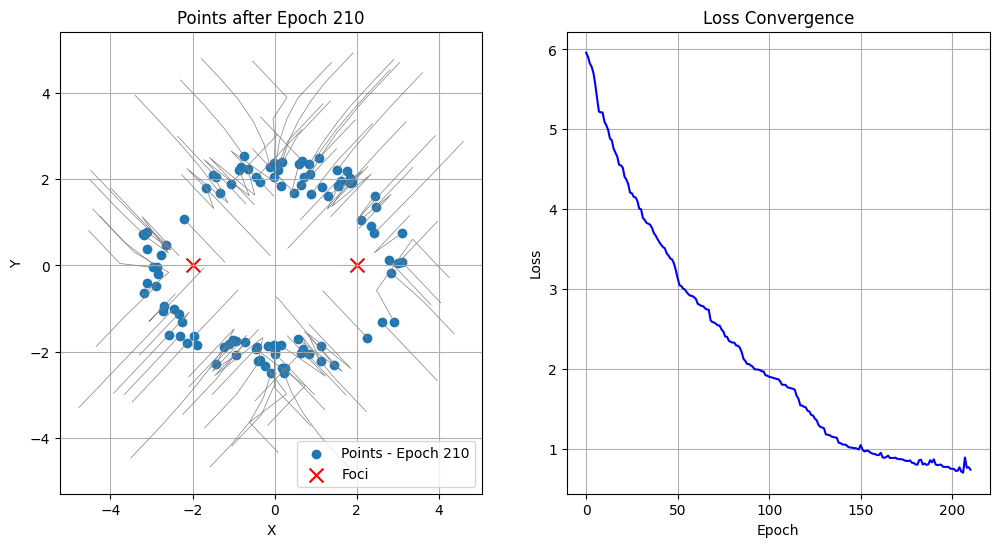

Epoch 210: Loss = 0.742652


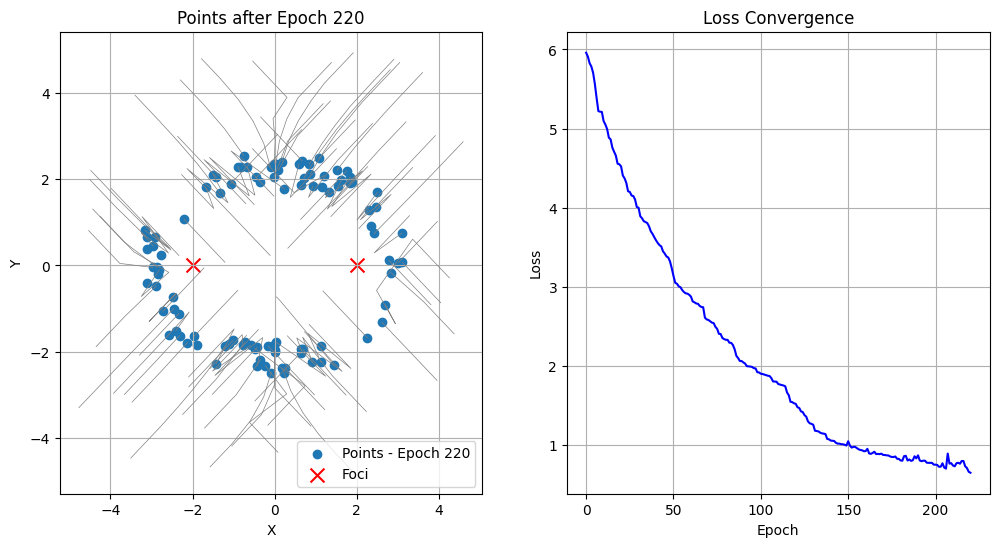

Epoch 220: Loss = 0.651860


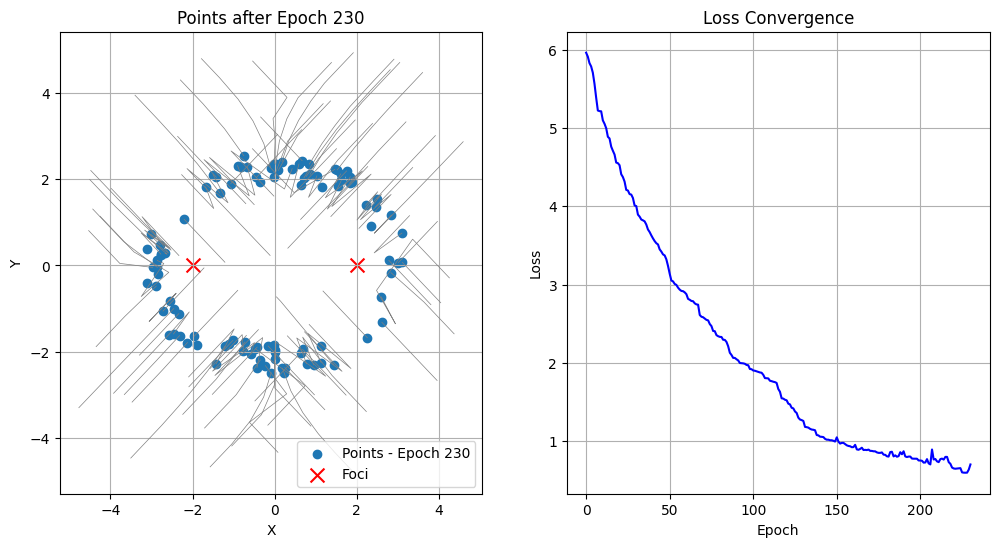

Epoch 230: Loss = 0.703062


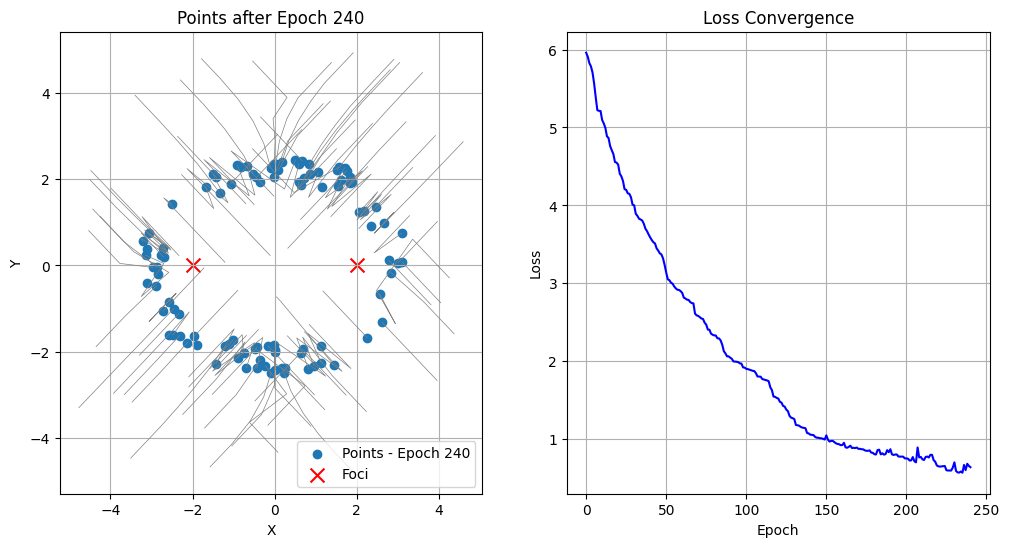

Epoch 240: Loss = 0.641267


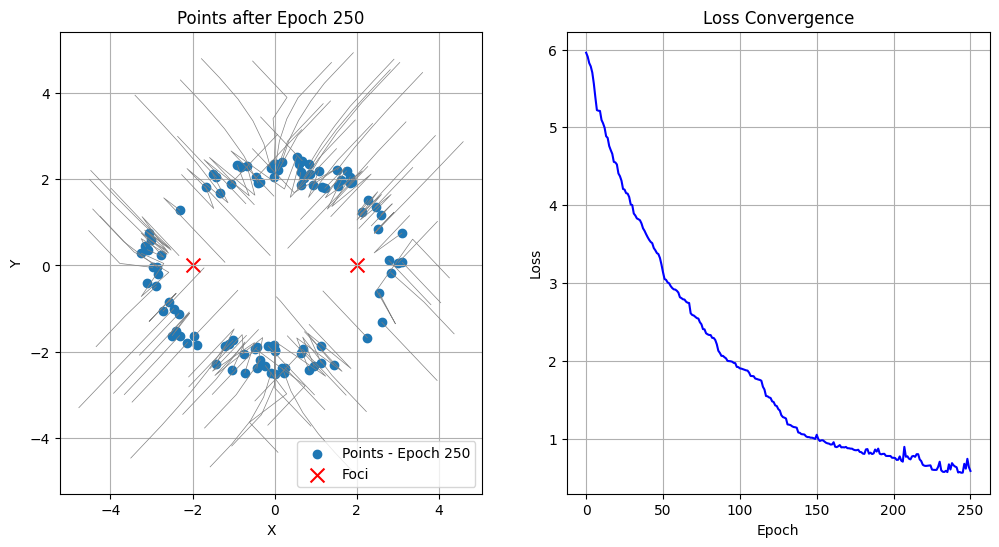

Epoch 250: Loss = 0.584289


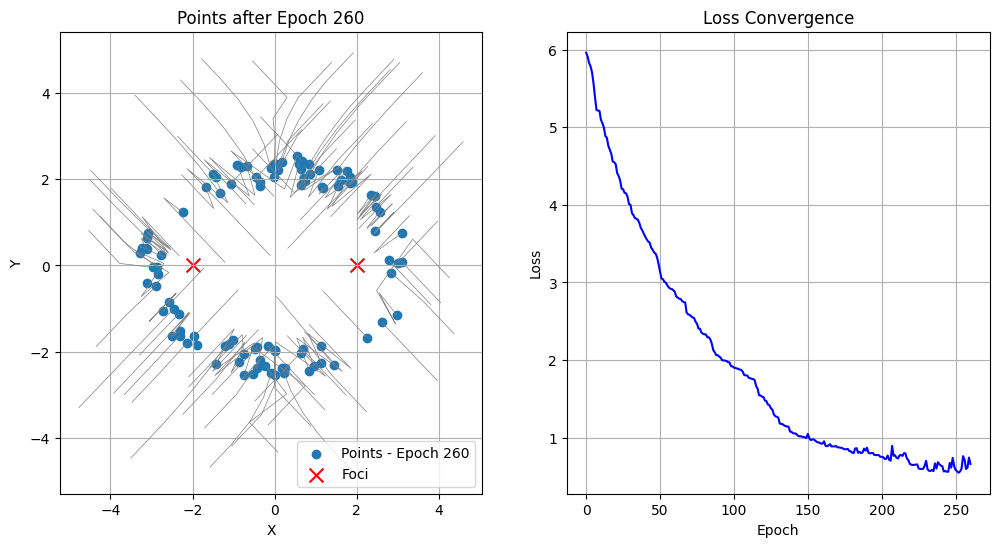

Epoch 260: Loss = 0.661789


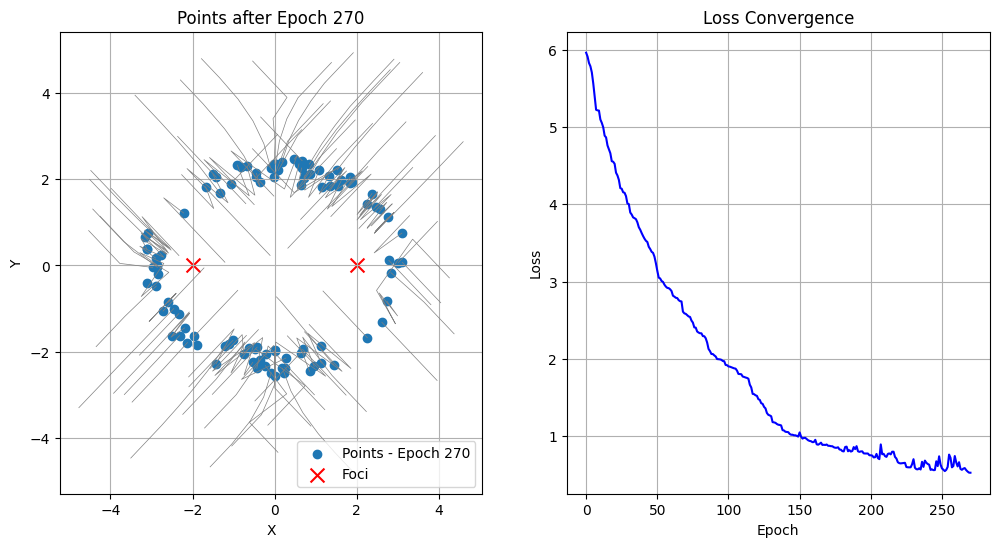

Epoch 270: Loss = 0.528107


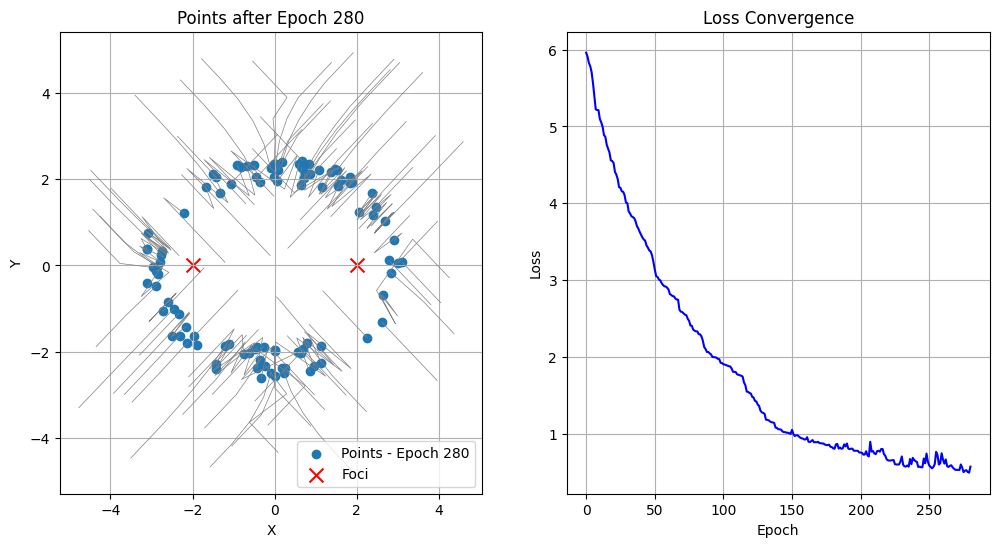

Epoch 280: Loss = 0.570207


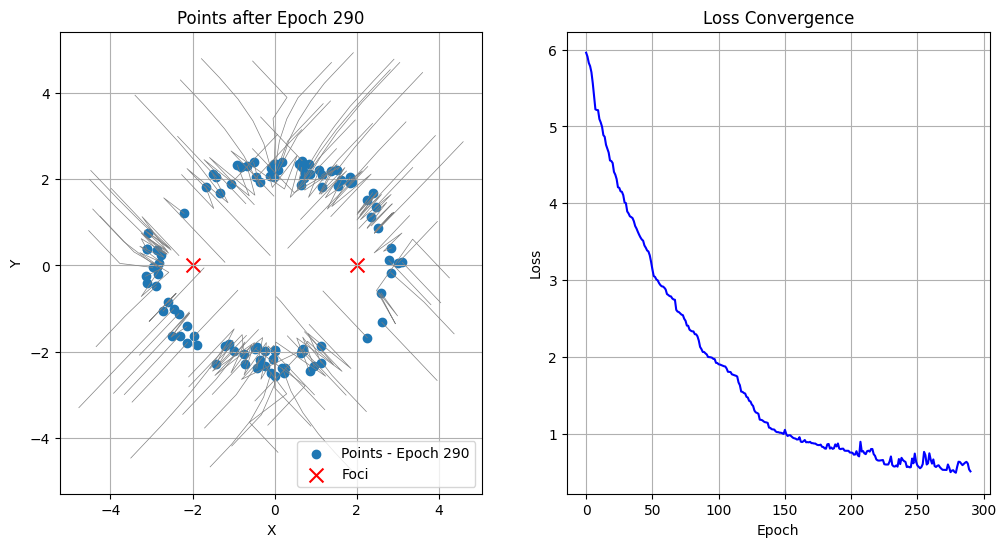

Epoch 290: Loss = 0.508902


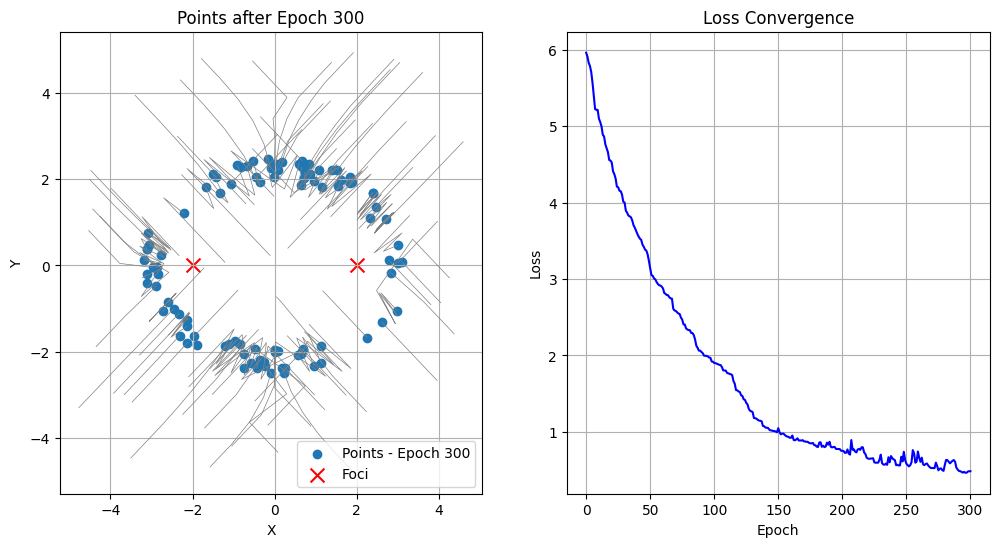

Epoch 300: Loss = 0.486356


Epoch 310: Loss = 0.534977


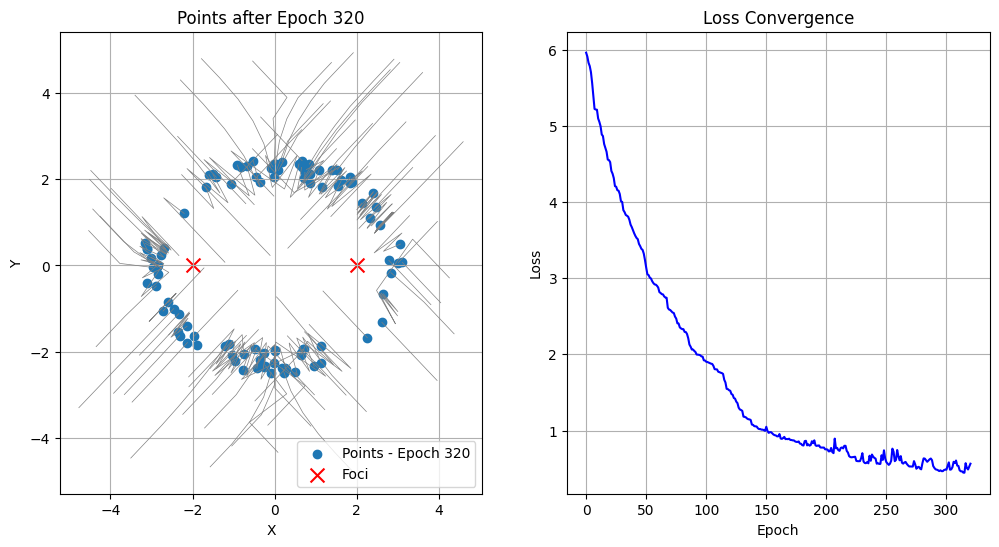

Epoch 320: Loss = 0.564713


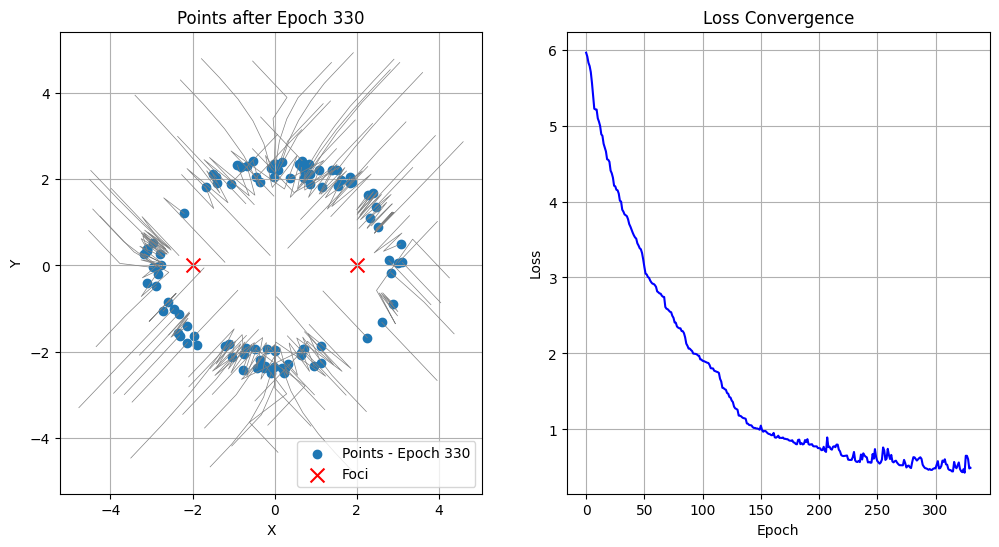

Epoch 330: Loss = 0.494422


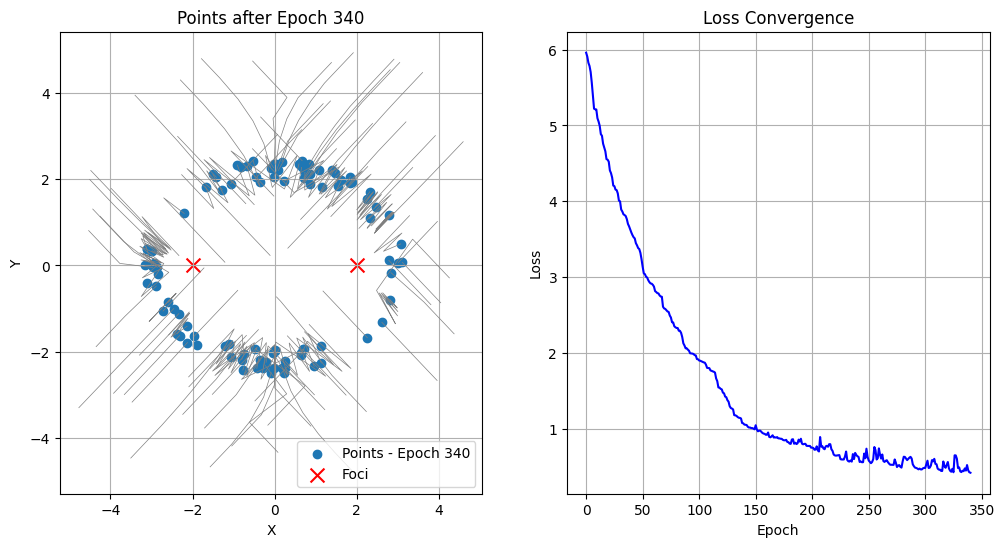

Epoch 340: Loss = 0.423568


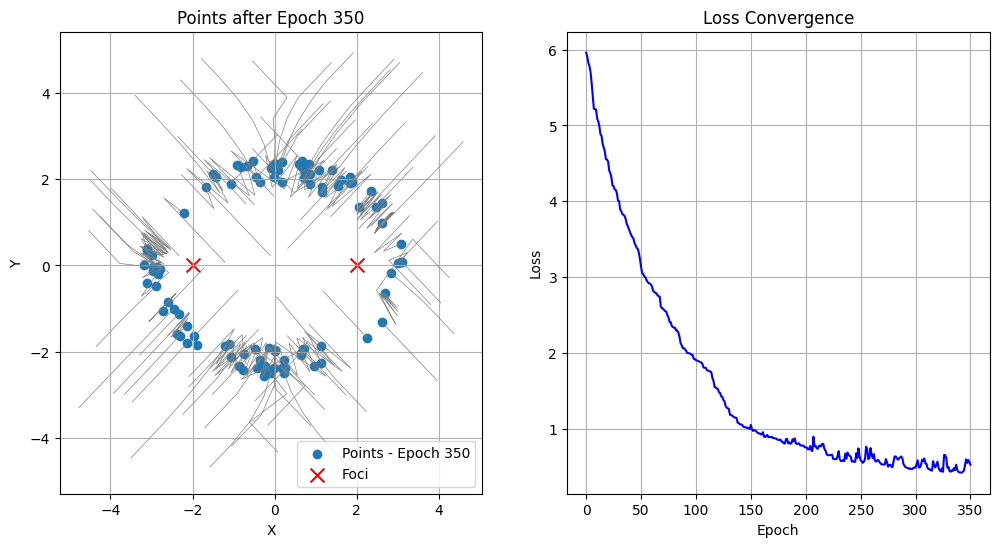

Epoch 350: Loss = 0.524878


Epoch 360: Loss = 0.445358


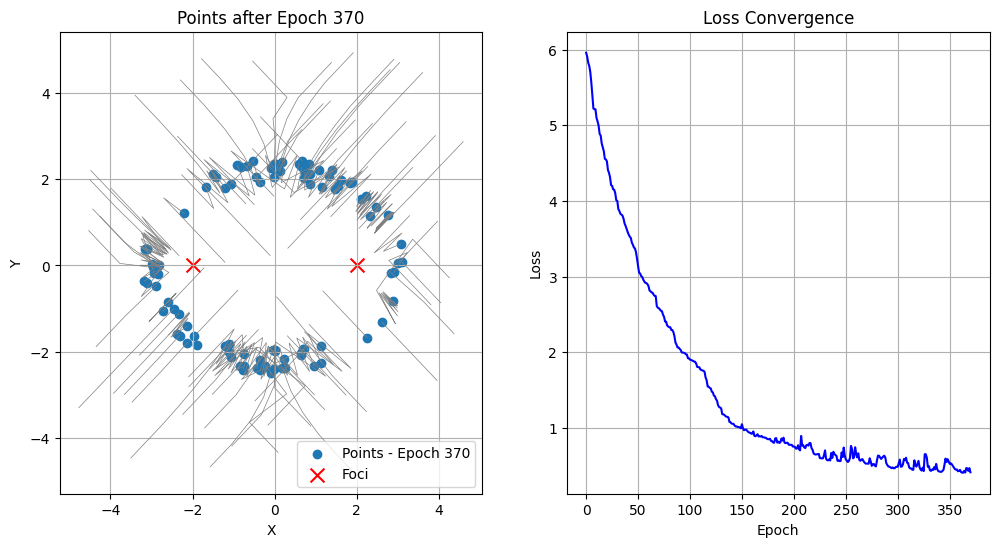

Epoch 370: Loss = 0.413644


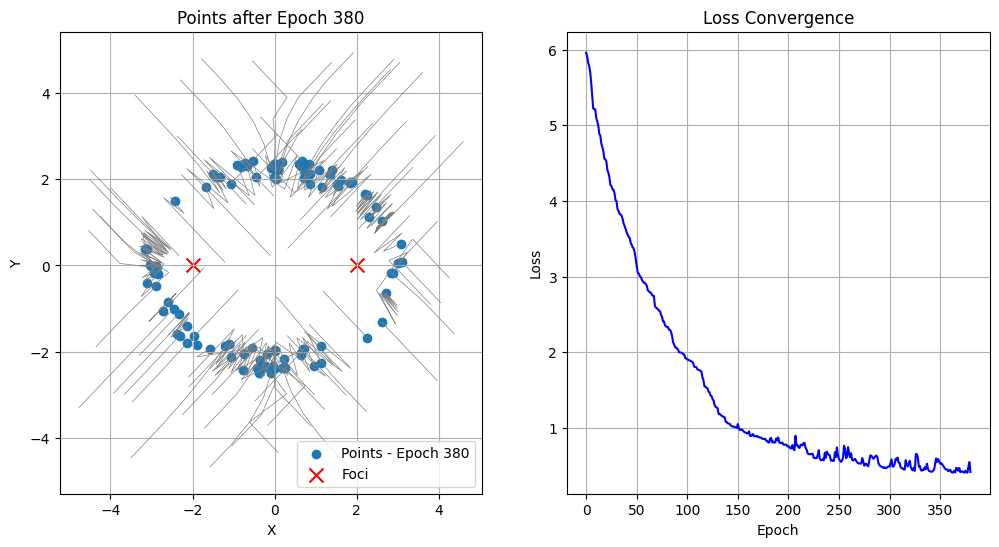

Epoch 380: Loss = 0.415447


Epoch 390: Loss = 0.438477


Elapsed time: 31.35 seconds


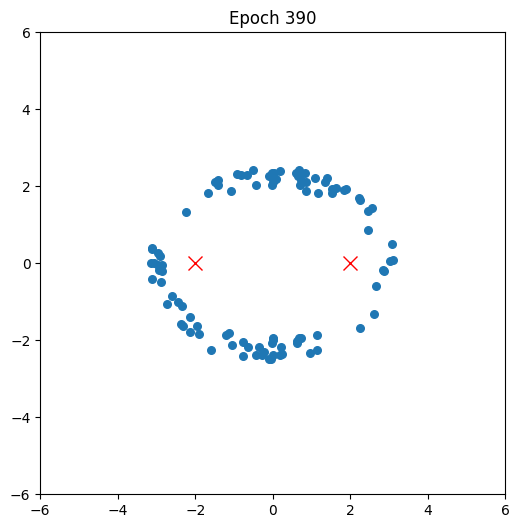

In [19]:
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # [-5, 5]
points.requires_grad = True


trajectories = [[] for _ in range(num_points)]
loss_history = []


start_time = time.time()
optimizer = torch.optim.Adam([points], lr=0.1)

num_epochs = 400
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    loss = torch.max(torch.abs(dist1 + dist2 - constant_sum))

    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    if epoch % 10 == 0:
        plot_results(epoch, trajectories, loss_history)
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

end_time = time.time()

display(make_animation(trajectories))

print(f"Elapsed time: {end_time - start_time:.2f} seconds")

Wniosek:

Ta funkcja straty koncentruje się wyłącznie na tym punkcie, który najbardziej odstaje od elipsy. Przez to poprawiany jest głównie jeden punkt na raz, co spowalnia cały proces i sprawia, że efekt końcowy nie jest precyzyjne. Co więcej, podobnie jak przy normie L1, ruchy punktów już dobrze dopasowanych pozostają zbyt gwałtowne, dlatego nie mamy zbieżności do 0.

